# Курсовая: Техническая механика
### Расчет червячной передачи

In [905]:
from math import pi, atan, degrees, cos, tan, radians

def degrees_to_radians(degrees, minutes=0):
    total_degrees = degrees + minutes / 60
    
    # Переводим градусы в радианы
    return radians(total_degrees)


In [906]:
# Частота вращения выходного вала редуктора
n_out = 59

### Выбор ЭД

In [907]:
# КПД общий
# КПД передачи = 0.8 (таблица 1.1)
kpd_m = 0.98
kpd_m * 0.8


0.784

In [908]:
# Мощность ЭД
0.9 / 0.784


1.1479591836734693

In [909]:
# Диапазон частот
print(f"{59*15} ... {59*30}")


885 ... 1770


***
##### Выбираю ЭД
4А80В4У3
(3 - Чернавский стр.26)
- Частота оборотов: 1500 Об/мин
- Мощность: 1500 Вт
- Скольжение: 5.8
(3 - Чернавский стр.521, 4- Дунаев стр.457)
- Диаметр вала: 22 мм

In [910]:
# Диаметр вала электродвигателя
d_ed= 22
# Фактическая частота вращения
n_fact = 1500 * (100 - 5.8) / 100
print(n_fact)

1413.0


In [911]:
# Передаточное число редуктора
print(f"{n_fact} / {n_out} = {n_fact/n_out:.2f}")


1413.0 / 59 = 23.95


In [912]:
# Принимаю стандартное значение передаточного числа редуктора по таблице 3.2
u_p = 25

***
### Определение кинематических и силовых параметров для каждого вала
***
#### Быстроходный вал

In [913]:
# Частота оборотов
n_fact

1413.0

In [914]:
# Угловая скорость
w1 = pi * n_fact / 30
print(f"{w1:.3f}")

147.969


In [915]:
# Мощность на входном валу после муфты
P1 = 1500 * 0.98
print(P1)

1470.0


In [916]:
# Момент на входном валу, Н*мм
T1 = P1 * 1000 / w1
print(T1)

9934.512371341238


***
#### Тихоходный вал

In [917]:
# Частота оборотов
n1 = n_fact
n2 = n1 / u_p
print(n2)

56.52


In [918]:
# Угловая скорость
w2 = pi * n2 / 30
print(w2)

5.91876055936317


In [919]:
# Мощность на выходном валу
# 0.8 - кпд для червячного редуктора (таблица 1.1)
P2 = P1 * 0.8
print(P2)

1176.0


In [920]:
# Вращающий момент
T2 = P2 * 1000 / w2
print(T2)

198690.24742682476


##### Моменты для дальнейших расчетов

In [921]:
# Принимаю моменты для расчетов, Н*мм
T1 = 9900
T2 = 198000

***
### Выбор материалов и допускаемых напряжений 

In [922]:
# Скорость скольжения
v_s = 4.5 * 10 ** (-4) * n1 * (T2 / 1000) ** (1/3)
print(v_s)

3.706036899045438


***
#### **Выбираю материал для червячного колеса**
Согласно таблице 3.1 стр.15

Бр А9ЖЗЛ

$σ_т = 200$

$σ_в = 400$

$σ_H = 300 - 25v_s$

$σ_F = 0,25σ_т+0,08σ_в$
***
$σ_H$

In [923]:
po_h = 300 - 25 * v_s
print(f"300 - 25*{v_s:.2f} = {300 - 25*v_s:.1f}")

300 - 25*3.71 = 207.3


$σ_F$

In [924]:
po_f = 0.25*200 + 0.08*400
print(po_f)

82.0


***
#### Проектный расчет червячной передачи по контактным напряжениям

In [925]:
# Согласно таблице 3.2 выбираю стандартное передаточное отношение
# Вычисляю число зубьев колеса
z1 = 2
z2 = z1 * u_p
print(z2)

50


In [926]:
# Определяю межосевое расстояние
K_n = 1.1
q = 12.5
T2_m = T2 / 1000
a_w = (z2/q + 1) * ((5400/(z2/q*po_h)) ** 2 * T2_m * K_n) ** (1/3)
print(f"({z2}/{q} + 1) * ((5400/({z2}/{q}*{po_h:.0f})) ** 2 * {T2_m} * {K_n}) ** (1/3) = {(z2/q + 1) * ((5400/(z2/q*po_h)) ** 2 * T2_m * K_n) ** (1/3):0f}")

# Выбираю стандартное значение a_w = 125 мм
a_w = 125

(50/12.5 + 1) * ((5400/(50/12.5*207)) ** 2 * 198.0 * 1.1) ** (1/3) = 104.892331


In [927]:
# Определяю величину осевого модуля для стандартного a_w
m = 2*a_w/(q + z2)
print(m)

4.0


***
#### Выбираю стандартные значения из таблицы 3.3

$a_w = 125$ мм

$m = 4$ мм

$q = 12,5$

$z_2:z_1 = 50:2$

***
#### Определяю геометрические параметры червяка

In [928]:
d1 = d_1b = q * m
print(d1)

50.0


In [929]:
da1 = d1 + 2 * m
print(da1)

58.0


In [930]:
df1 = d1 - 2.4*m
print(df1)

40.4


In [931]:
# Длина нарезанной части червяка
b1 = (11 + 0.06*z2)*m
print(b1)

56.0


***
#### Определяю геометрические параметры колеса

In [932]:
d2 = d_2t = m * z2
print(d2)

200.0


In [933]:
da2 = d2 + 2*m
print(da2)

208.0


In [934]:
# Наибольший диаметр червячного колеса
d_am2 = da2 + 6*m/(z1 + 2)
print(f"{da2} + 6*{m}/({z1} + 2) = {da2 + 6*m/(z1 + 2)}")

208.0 + 6*4.0/(2 + 2) = 214.0


In [935]:
df2 = d2 - 2.4*m
print(df2)

190.4


In [936]:
# Ширина зубчатого венца червячного колеса
b2 = 0.75*da1
print(b2)
b2 = 44
print(b2)

43.5
44


### Параметры ступицы смотри далее

In [937]:
# Проверяю выбранное значение v_s
tg_y = z1/q
print(tg_y)

0.16


In [938]:
y = atan(tg_y)
print(y)

0.1586552621864014


In [939]:
# Угол в градусах
deg_y = degrees(y)
print(deg_y)

9.090276920822323


***
#### Проверочный рассчет по контактным напряжениям

In [940]:
# Проверяю условие прочности выбранной стандартной передачи
temp = (5400/(z2/q))*(((z2/q+1)/a_w)**3*T2_m*K_n)**(0.5)
print(f"(5400/({z2}/{q}))*((({z2}/{q}+1)/{a_w})**3*{T2_m}*{K_n})**(0.5) = {(5400/(z2/q))*(((z2/q+1)/a_w)**3*T2_m*K_n)**(0.5)}")

(5400/(50/12.5))*(((50/12.5+1)/125)**3*198.0*1.1)**(0.5) = 159.38692543618504


##### Прочность по контрольным напряжениям обеспечена так как 159 МПа < 206 МПа 

***
#### Проверка прочности зубьев червячного венца на изгиб

In [941]:
# Окружная сила на колесе
Ft2 = 2 * T2/d2
print(f"2 * {T2}/{d2} = {2 * T2/d2}")

2 * 198000/200.0 = 1980.0


In [942]:
# Окружная сила на червяке
Ft1 = 2 * T1/d1
print(f"2 * {T1}/{d1} = {2 * T1/d1}")

2 * 9900/50.0 = 396.0


In [943]:
# Определение коэффициента формы зуба из таблицы 3.7
z_v = z2/cos(y) ** 3
print(f"{z2}/cos({y:.4f}) ** 3 = {z2/cos(y) ** 3:.1f}")

50/cos(0.1587) ** 3 = 51.9


##### Принимаю форму зуба из таблицы 3.7
$Y_F = 1,45$

Значения коэффициентов расчетной нагрузки $K_н$ и $K_F$ принимаются одинаковыми (стр.18) = 1

In [944]:
Y_F = 1.45
K_F = 1
po_ff = 0.7*Y_F*Ft2*K_F/(b2*m)
print(f"0.7*{Y_F}*{Ft2}*{K_F}/({b2}*{m}) = {0.7*Y_F*Ft2*K_F/(b2*m):.2f}")
print(f"{po_ff:.1f} < {po_f}")
print("Прочность по напряжениям изгиба обеспечена")

0.7*1.45*1980.0*1/(44*4.0) = 11.42
11.4 < 82.0
Прочность по напряжениям изгиба обеспечена


***
##### Уточняю КПД червячной передачи


In [945]:
kpd_b = tan(y)/tan(y + degrees_to_radians(1, 26))
print(kpd_b)

0.8613018256599354


##### Общий КПД
КПД = КПДп * КПДм

In [946]:
kpd_sum = kpd_b * kpd_m
print(f"{kpd_b:.3f} * {kpd_m} = {kpd_b * kpd_m:.3f}")
# print(kpd_sum)

0.861 * 0.98 = 0.844


##### Тепловой расчет


In [947]:
# FF = P1*(1 - kpd_sum)*A

***
### Расчет валов

#### Расчет выполняю по таблице 4.1
##### Быстроходный вал (червяк)

In [948]:
# 1 ступень под муфту
d_1st = 1.2 * d_ed
print(f"1.2 * {d_ed} = {1.2 * d_ed}")
d_1st = 24
print(d_1st)

1.2 * 22 = 26.4
24


In [949]:
# 2 ступень под уплотнение крышки с отверстием и подшипник
t = 2 # Таблица 4.2
d_2st = d_1st + 2 * t
print(d_2st)
d_2st = 30
print(d_2st)


28
30


In [950]:
# 3 ступень под шестерню
r = 1 # таблица 4.2
d_3st = d_2st + 3.2 * r
print(d_3st)
d_3st = 34
print(d_3st)

33.2
34


In [951]:
# 4 ступень
d_4st = d_2st
print(d_4st)

30


##### Выходной вал (червячное колесо)

In [952]:
# Выходной вал под муфту: 1-я ступень
d_1st_2 = (T2/(0.2 * 40)) ** (1/3)
print(d_1st_2)
d_1st_2 = 30
print(d_1st_2)

29.142383416257275
30


In [953]:
# 2-я ступень
t = 2.5
d_2st_2 = d_1st_2 + 2 * t
print(d_2st_2)

35.0


In [954]:
# 3-я ступень
d_3st_2 = d_2st_2 + 3.2 * r
print(d_3st_2)
d_3st_2 = 40
print(d_3st_2)

38.2
40


In [955]:
# 4-я ступень
d_4st_2 = d_2st_2
print(d_4st_2)

35.0


***
#### Конструирование червячной передачи стр.20 (Ступица)

In [956]:
# Наибольший диаметр червячного колеса
d_am2 = da2 + 6*m/(z1 + 2)
print(f"{da2} + 6*{m}/({z1} + 2) = {da2 + 6*m/(z1 + 2)}")

208.0 + 6*4.0/(2 + 2) = 214.0


In [957]:
# Наружний диаметр ступицы
d_st = 1.8 * d_3st_2
print(f"1.8 * {d_3st_2} = {1.8 * d_3st_2}")

1.8 * 40 = 72.0


In [958]:
l_st = 1.7 * d_3st_2
print(l_st)

68.0


In [959]:
po_1 = po_2 = 2 * m
print(po_1)

8.0


In [1024]:
C = 0.25 * b2
print(C)
C = 12
print(C)

11.0
12


In [961]:
# d винта
d_vint = 1.4*m
print(d_vint)

5.6


In [962]:
# l винта
l_vint = 0.4*b2
print(l_vint)

17.6


In [963]:
f = 0.2*d_vint
print(f)

1.1199999999999999


##### Параметры ступеней валов и подшипников

In [964]:
from IPython.display import Markdown

l_1st = 50
l_2st = 55
l_3st = 170
l_4st = 30

l_1st_2 = 50
l_2st_2 = 50
l_3st_2 = 90
l_4st_2 = 50

Markdown(f"""
##### Быстроходный вал
| d1 / l1 | d2 / l2 | d3 / l3 | d4 / l4 |
|-------|------|------|------|
| {d_1st} / {l_1st} | {d_2st} / {l_2st} | {d_3st} / {l_3st} | {d_4st} / {l_4st}|

###### Подшипники для быстроходного вала
| Обозначение | $dxDxB(T)$ | $Cr, кН$ | $C_0, кН$ | $α°$ |
|------|-------|------|------|------|
| 7606 | 30х72х29х29 | 63 | 51 | - |
***
##### Тихоходный вал
| d1 / l1 | d2 / l2 | d3 / l3 | d4 / l4 |
|-------|------|------|------|
| {d_1st_2} / {l_1st_2} | {d_2st_2} / {l_2st_2} | {d_3st_2} / {l_3st_2} | {d_4st_2} / {l_4st_2}|

##### Подшипники для тихоходного вала
| Обозначение | $dxDxB(T)$ | $Cr, кН$ | $C_0, кН$ | $α°$ |
|------|-------|------|------|------|
| 36207 | 35х72х17 | 24 | 18 | 12 |
***

""")



##### Быстроходный вал
| d1 / l1 | d2 / l2 | d3 / l3 | d4 / l4 |
|-------|------|------|------|
| 24 / 50 | 30 / 55 | 34 / 170 | 30 / 30|

###### Подшипники для быстроходного вала
| Обозначение | $dxDxB(T)$ | $Cr, кН$ | $C_0, кН$ | $α°$ |
|------|-------|------|------|------|
| 7606 | 30х72х29х29 | 63 | 51 | - |
***
##### Тихоходный вал
| d1 / l1 | d2 / l2 | d3 / l3 | d4 / l4 |
|-------|------|------|------|
| 30 / 50 | 35.0 / 50 | 40 / 90 | 35.0 / 50|

##### Подшипники для тихоходного вала
| Обозначение | $dxDxB(T)$ | $Cr, кН$ | $C_0, кН$ | $α°$ |
|------|-------|------|------|------|
| 36207 | 35х72х17 | 24 | 18 | 12 |
***



### Выбор шпонок
Шпонки выбираю по таб. 4.8 стр 23


#### Быстроходный вал: шпонка


In [965]:
# Быстроходный вал
# Проверяю шпонку на смятие
b_sh_b = 8
h_sh_b = 7
l_obsh_b = 32
l_rb = l_obsh_b - b_sh_b
print(l_rb)
t1_b = 4
p_sm = 2 * T1/(d_1st*l_rb*(h_sh_b - t1_b))
print(f"смятие = 2 * {T1}/({d_1st}*{l_rb}*({h_sh_b} - {t1_b})) = {2 * T1/(d_1st*l_rb*(h_sh_b - t1_b))}")

24
смятие = 2 * 9900/(24*24*(7 - 4)) = 11.458333333333334


In [1027]:
# Тихоходный вал
# Проверяю шпонку на смятие
b_sh_t = 12
h_sh_t = 8
l_obsh_t = 50
l_rt = l_obsh_t - b_sh_t
t1_t = 5
p_sm = 2 * T2/(d_3st_2*l_rt*(h_sh_t - t1_t))
print(f"2 * {T2}/({d_3st_2}*{l_rt}*({h_sh_t} - {t1_t})) = {2 * T2/(d_3st_2*l_rt*(h_sh_t - t1_t))}")

2 * 198000/(40*38*(8 - 5)) = 86.84210526315789


***
### Определение сил в зацеплении и консольных сил от муфт
табл.4.10
***

In [967]:
# Окружная сила на червяке
print(f"2*{T1}/{d1} = {2*T1/d1}")
print("Ft1")

2*9900/50.0 = 396.0
Ft1


In [968]:
# Окружная сила на колесе
print(f"2*{T2}/{d2} = {2*T2/d2}")
print("Ft2")


2*198000/200.0 = 1980.0
Ft2


In [969]:
# Радиальная сила на колесе и на червяке
Fr2 = Ft2*tan(radians(20))
print(Fr2)
Fr1 = Fr2 = 720
print(Fr2)

720.6610638470806
720


In [970]:
# Осевая сила на червяке
Fa1 = Ft2
print(Fa1)

1980.0


In [971]:
# Осевая сила на колесе
Fa2 = Ft1
print(Fa2)

396.0


In [972]:
# Сила на муфте (быстроходный вал)
Fm1 = 4*(T1) ** 0.5
print(Fm1)
Fm1 = 398
print(Fm1)

397.994974842648
398


***
# Реакции и эпюры

***
### Расчет быстроходного вала

In [973]:
# Расчет места приложения сил в радиально упорном подшипнике
print(0.5*(29+0.5*(30+72)*tan(radians(12))))

19.920192322585564


In [974]:
# Расчет быстроходного вала
def calc_b():
    # Подшипник: 7606
    d_podsh = 30
    D_podsh = 72
    T_podsh = 29
    alpha_podsh = 12

    # Точка приложения опорной силы в коническом подшипнике
    a_podsh = 0.5*(T_podsh + 0.5*(d_podsh + D_podsh)*tan(radians(alpha_podsh)))
    print(f"a_podsh = {a_podsh}")
    a_podsh = 20
    print(f"a_podsh = {a_podsh}")

    # Списки для построения эпюр
    lst_x1 = [0]
    lst_M1 = [0]
    lst_x2 = [0]
    lst_M2 = [0]

    # Червяк: длины, мм
    l1 = l_1st
    l2 = l_2st
    l3 = l_3st
    l4 = l_4st
    d1 = d_1b

    # Участки, мм
    a = T_podsh - a_podsh + l3/2
    b = a
    c = l2 - (T_podsh - a_podsh) + l1/2
    d = d1/2
    print(f"a = {a}, b = {b}, c = {c}, d = {d}")

    # Силы, Н
    Ft = Ft1
    Fr = Fr1
    Fa = Fa1
    Fm = Fm1

    #----------------------------------------
    # Вертикальная плоскость: XY

    #-----------1. Реакции--------------------
    # Моменты: положительно = против часовой стрелки

    # ∑M(A) = 0
    # -Fr*a - Fa*d + Rb*(a + b) = 0
    Rb = Rb1 = (Fr*a + Fa*d)/(a + b)

    # ∑M(B) = 0
    # -Ra*(a + b) + Fr*b - Fa*d = 0
    Ra = Ra1 = (Fr*b - Fa*d)/(a + b)

    # Проверка ось Y
    # Ra + Rb - Fr = 0
    assert Ra + Rb - Fr == 0, 'Сумма сил должна быть равна нулю'

    # Вывод результата
    print("\n1.Расчет реакции опор")
    print("Вертикальная плоскость: XY")
    print(f"Момент Fa*d = {Fa*d} Н·мм")
    print("Ось Y")
    print(f"Ra = {Ra:.3f}")
    print(f"Rb = {Rb:.3f}\n")


    #-------------2. Эпюры--------------------
    # Силы: положительно = балка крутится
    # по часовой стрелке
    #
    # Моменты: положительно = балка хочет изогнуться
    # вверх

    # 1.Участок 0 ≤ x ≤ a
    # x = a
    Ma = Ra * a

    # Записываю результат
    lst_x1 += [a]
    lst_M1 += [Ma]

    # Вывод результата
    print("\n2.Построение эпюр")
    print("Вертикальная плоскость: XY")
    print("1.Участок 0 ≤ x ≤ a")
    print("x = 0: Миy = 0")
    print(f"x = a: Миy = {Ma:.1f}\n")


    # 2.Участок a ≤ x ≤ (a + b)
    # x = a
    Ma = Ra * a + Fa * d
    # x = a + b
    Mb = Ra * (a + b) + Fa * d - Fr * b

    # Записываю результат
    lst_x1 += [a, a + b, a + b + c]
    lst_M1 += [Ma, Mb, 0]

    # Вывод результата
    print("2.Участок a ≤ x ≤ (a + b)")
    print(f"x = a: Миy = {Ma:.1f}")
    print(f"x = a+b: Миy = {Mb:.1f}\n")
    print("--------------------------------------------------\n")


    #----------------------------------------
    # Горизонтальная плоскость: XZ

    #-----------1. Реакции--------------------
    # Моменты: положительно = против часовой стрелки

    # ∑M(A) = 0
    # Ft*a - Rb*(a + b) - Fm*(a + b + c) = 0
    Rb = Rb2 = (Ft*a - Fm*(a + b + c))/(a + b)

    # ∑M(B) = 0
    # Ra*(a + b) - Ft*b - Fm*c = 0
    Ra = Ra2 = (Ft*b + Fm*c)/(a + b)

    # Проверка ось Z
    # Ra - Ft + Rb + Fm = 0

    assert Ra - Ft + Rb + Fm == 0 , 'Сумма сил должна быть равна нулю'

    # Вывод результата
    print("1.Расчет реакции опор")
    print("Горизонтальная плоскость: XZ")
    print("Ось Z")
    print(f"Ra = {Ra:.3f}")
    print(f"Rb = {Rb:.3f}\n")


    #-------------2. Эпюры--------------------
    # Силы: положительно = балка крутится
    # по часовой стрелке
    #
    # Моменты: положительно = балка хочет изогнуться
    # вверх

    # 1.Участок 0 ≤ x ≤ a
    # x = a
    Ma = -Ra * a

    # Записываю результат
    lst_x2 += [a]
    lst_M2 += [Ma]

    # Вывод результата
    print("\n2.Построение эпюр")
    print("Горизонтальная плоскость: XZ\n")
    print("1.Участок 0 ≤ x ≤ a")
    print("x = 0: Миy = 0")
    print(f"x = a: Миy = {Ma:.1f}\n")

    # 2.Участок a ≤ x ≤ (a + b)
    # x = a
    Ma = -Ra * a
    # x = a + b
    Mb = -Ra * (a + b) + Ft * b

    # Записываю результат
    lst_x2 += [a, a + b]
    lst_M2 += [Ma, Mb]

    # Вывод результата
    print("2.Участок a ≤ x ≤ (a + b)")
    print(f"x = a: Миy = {Ma:.1f}")
    print(f"x = a+b: Миy = {Mb:.1f}\n")

    # 3.Участок (a + b) ≤ x ≤ (a + b + c)
    # x = a + b
    Mb = -Ra * (a + b) + Ft * b
    # x = a + b + c
    Mc = -Ra * (a + b + c) + Ft * (b + c) - Rb * c

    # Записываю результат
    lst_x2 += [a + b, a + b + c]
    lst_M2 += [Mb, Mc]

    # Вывод результата
    print("3.Участок (a + b) ≤ x ≤ (a + b + c)")
    print(f"x = a+b: Миy = {Mb:.1f}")
    print(f"x = a+b+c: Миy = {Mc:.1f}\n")

    return (lst_x1, lst_M1), (lst_x2, lst_M2), (Ra1 ** 2 + Ra2 ** 2) ** 0.5, (Rb1 ** 2 + Rb2 ** 2) ** 0.5

resultY, resultX, Ra_sum_1, Rb_sum_1 = calc_b()

a_podsh = 19.920192322585564
a_podsh = 20
a = 94.0, b = 94.0, c = 71.0, d = 25.0

1.Расчет реакции опор
Вертикальная плоскость: XY
Момент Fa*d = 49500.0 Н·мм
Ось Y
Ra = 96.702
Rb = 623.298


2.Построение эпюр
Вертикальная плоскость: XY
1.Участок 0 ≤ x ≤ a
x = 0: Миy = 0
x = a: Миy = 9090.0

2.Участок a ≤ x ≤ (a + b)
x = a: Миy = 58590.0
x = a+b: Миy = 0.0

--------------------------------------------------

1.Расчет реакции опор
Горизонтальная плоскость: XZ
Ось Z
Ra = 348.309
Rb = -350.309


2.Построение эпюр
Горизонтальная плоскость: XZ

1.Участок 0 ≤ x ≤ a
x = 0: Миy = 0
x = a: Миy = -32741.0

2.Участок a ≤ x ≤ (a + b)
x = a: Миy = -32741.0
x = a+b: Миy = -28258.0

3.Участок (a + b) ≤ x ≤ (a + b + c)
x = a+b: Миy = -28258.0
x = a+b+c: Миy = -0.0



***
#### Суммарная реакция опор на подшипниках быстроходного вала

In [975]:
# Подшипник A
print(f"Ra_сум = {Ra_sum_1:.1f} Н\n")
# Подшипник B
print(f"Rb_сум = {Rb_sum_1:.1f} Н\n")


Ra_сум = 361.5 Н

Rb_сум = 715.0 Н



#### Максимальный изгибающий момент для быстроходного вала

In [976]:
M_k1 = (58590 ** 2 + 32741 ** 2) ** 0.5
print(int(M_k1))
M_k1 = 67100
print(M_k1)

67117
67100


***
### Графики изгибающих моментов для быстроходного вала

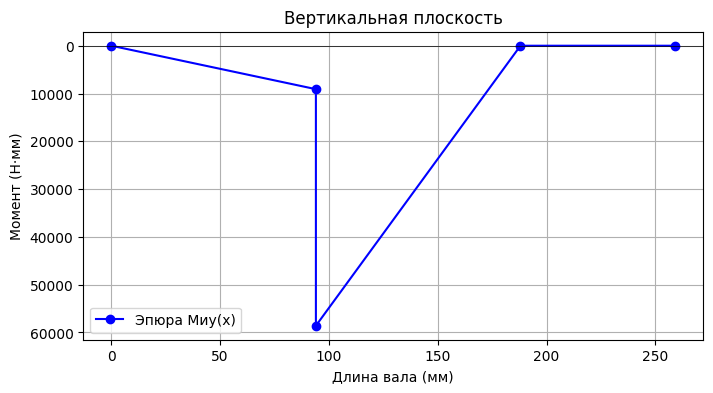

In [977]:
import matplotlib.pyplot as plt

x, M = resultY

plt.figure(figsize=(8, 4))
plt.plot(x, M, marker='o', linestyle='-', color='blue', label='Эпюра Mиy(x)')
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('Длина вала (мм)')
plt.ylabel('Момент (Н·мм)')
plt.title('Вертикальная плоскость')
plt.grid(True)
plt.legend()

# Инвертируем ось Y
plt.gca().invert_yaxis()
plt.show()



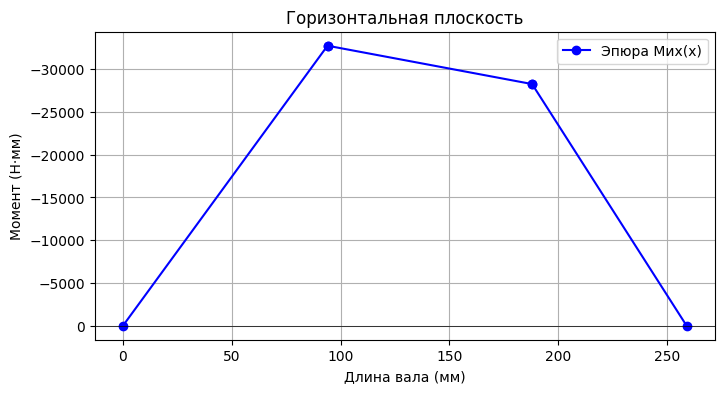

In [978]:
x, M = resultX

plt.figure(figsize=(8, 4))
plt.plot(x, M, marker='o', linestyle='-', color='blue', label='Эпюра Mиx(x)')
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('Длина вала (мм)')
plt.ylabel('Момент (Н·мм)')
plt.title('Горизонтальная плоскость')
plt.grid(True)
plt.legend()

# Инвертируем ось Y
plt.gca().invert_yaxis()
plt.show()

***
### Расчет тихоходного вала

In [979]:
def calc_t():

    # Списки для построения эпюр
    lst_x1 = [0]
    lst_M1 = [0]
    lst_x2 = [0]
    lst_M2 = [0]

    # Червяк: длины, мм
    l1 = l_1st_2
    l2 = l_2st_2
    l3 = l_3st_2
    l4 = l_4st_2
    d1 = d_2t

    # Участки, мм
    a = l4/2 + l3/2
    b = a
    c = l2/2
    d = d1/2

    # Силы, Н
    Ft = Ft2
    Fr = Fr2
    Fa = Fa2

    #----------------------------------------
    # Вертикальная плоскость: XY

    #-----------1. Реакции--------------------
    # Моменты: положительно = против часовой стрелки

    # ∑M(A) = 0
    # -Fr*a + Fa*d + Rb*(a + b) = 0
    Rb = Rb1 = (Fr*a - Fa*d)/(a + b)

    # ∑M(B) = 0
    # -Ra*(a + b) + Fr*b + Fa*d = 0
    Ra = Ra1 = (Fr*b + Fa*d)/(a + b)

    # Проверка ось Y
    # Ra + Rb - Fr = 0
    assert Ra + Rb - Fr == 0, 'Сумма сил должна быть равна нулю'

    # Вывод результата
    print("\n1.Расчет реакции опор")
    print("Вертикальная плоскость: XY")
    print(f"Момент Fa*d = {Fa*d} Н·мм")
    print("Ось Y")
    print(f"Ra = {Ra:.3f}")
    print(f"Rb = {Rb:.3f}\n")


    #-------------2. Эпюры--------------------
    # Силы: положительно = балка крутится
    # по часовой стрелке
    #
    # Моменты: положительно = балка хочет изогнуться
    # вверх

    # 1.Участок 0 ≤ x ≤ a
    # x = a
    Ma = Ra * a

    # Записываю результат
    lst_x1 += [a]
    lst_M1 += [Ma]

    # Вывод результата
    print("\n2.Построение эпюр")
    print("Вертикальная плоскость: XY")
    print("1.Участок 0 ≤ x ≤ a")
    print("x = 0: Миy = 0")
    print(f"x = a: Миy = {Ma:.1f}\n")


    # 2.Участок a ≤ x ≤ (a + b)
    # x = a
    Ma = Ra * a - Fa * d
    # x = a + b
    Mb = Ra*(a + b) - Fa * d - Fr * b

    # Записываю результат
    lst_x1 += [a, a + b, a + b + c]
    lst_M1 += [Ma, Mb, 0]

    # Вывод результата
    print("2.Участок a ≤ x ≤ (a + b)")
    print(f"x = a: Миy = {Ma:.1f}")
    print(f"x = a+b: Миy = {Mb:.1f}\n")
    print("--------------------------------------------------\n")


    #----------------------------------------
    # Горизонтальная плоскость: XZ

    #-----------1. Реакции--------------------
    # Моменты: положительно = против часовой стрелки

    # ∑M(A) = 0
    # -Ft*a + Rb*(a + b) = 0
    Rb = Rb2 = Ft*a/(a + b)

    # ∑M(B) = 0
    # -Ra*(a + b) + Ft*b = 0
    Ra = Ra2 = Ft*b/(a + b)

    # Проверка ось Z
    # Ra - Ft + Rb + Fm = 0
    assert Ra - Ft + Rb == 0 , 'Сумма сил должна быть равна нулю'

    # Вывод результата
    print("1.Расчет реакции опор")
    print("Горизонтальная плоскость: XZ")
    print("Ось Z")
    print(f"Ra = {Ra:.3f}")
    print(f"Rb = {Rb:.3f}\n")


    #-------------2. Эпюры--------------------
    # Силы: положительно = балка крутится
    # по часовой стрелке
    #
    # Моменты: положительно = балка хочет изогнуться
    # вверх

    # 1.Участок 0 ≤ x ≤ a
    # x = a
    Ma = Ra * a

    # Записываю результат
    lst_x2 += [a]
    lst_M2 += [Ma]

    # Вывод результата
    print("\n2.Построение эпюр")
    print("Горизонтальная плоскость: XZ\n")
    print("1.Участок 0 ≤ x ≤ a")
    print("x = 0: Миy = 0")
    print(f"x = a: Миy = {Ma:.1f}\n")

    # 2.Участок a ≤ x ≤ (a + b)
    # x = a
    Ma = Ra * a
    # x = a + b
    Mb = Ra * (a + b) - Ft * b

    # Записываю результат
    lst_x2 += [a, a + b, a + b + c]
    lst_M2 += [Ma, Mb, 0]

    # Вывод результата
    print("2.Участок a ≤ x ≤ (a + b)")
    print(f"x = a: Миy = {Ma:.1f}")
    print(f"x = a+b: Миy = {Mb:.1f}\n")
    return (lst_x1, lst_M1), (lst_x2, lst_M2), (Ra1 ** 2 + Ra2 ** 2) ** 0.5, (Rb1 ** 2 + Rb2 ** 2) ** 0.5

resultY_2, resultX_2, Ra_sum_2, Rb_sum_2 = calc_t()


1.Расчет реакции опор
Вертикальная плоскость: XY
Момент Fa*d = 39600.0 Н·мм
Ось Y
Ra = 642.857
Rb = 77.143


2.Построение эпюр
Вертикальная плоскость: XY
1.Участок 0 ≤ x ≤ a
x = 0: Миy = 0
x = a: Миy = 45000.0

2.Участок a ≤ x ≤ (a + b)
x = a: Миy = 5400.0
x = a+b: Миy = 0.0

--------------------------------------------------

1.Расчет реакции опор
Горизонтальная плоскость: XZ
Ось Z
Ra = 990.000
Rb = 990.000


2.Построение эпюр
Горизонтальная плоскость: XZ

1.Участок 0 ≤ x ≤ a
x = 0: Миy = 0
x = a: Миy = 69300.0

2.Участок a ≤ x ≤ (a + b)
x = a: Миy = 69300.0
x = a+b: Миy = 0.0



***
#### Суммарная реакция опор на подшипниках тихоходного вала

In [980]:
# Подшипник A
print(f"Ra_сум = {Ra_sum_2:.1f} Н\n")
# Подшипник B
print(f"Rb_сум = {Rb_sum_2:.1f} Н\n")

Ra_сум = 1180.4 Н

Rb_сум = 993.0 Н



#### Максимальный изгибающий момент для тихоходного вала

In [981]:
M_k2 = (45000 ** 2 + 69300 ** 2) ** 0.5
print(M_k2)
M_k2 = 82600
print(M_k2)

82628.62700057408
82600


***
### Графики изгибающих моментов для тихоходного вала

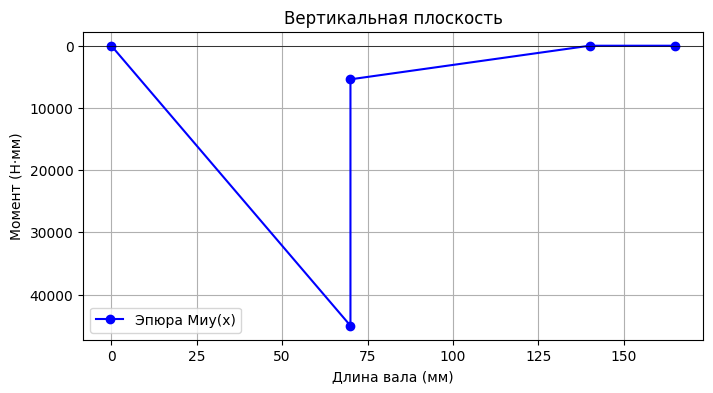

In [982]:
import matplotlib.pyplot as plt

x, M = resultY_2

plt.figure(figsize=(8, 4))
plt.plot(x, M, marker='o', linestyle='-', color='blue', label='Эпюра Mиy(x)')
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('Длина вала (мм)')
plt.ylabel('Момент (Н·мм)')
plt.title('Вертикальная плоскость')
plt.grid(True)
plt.legend()

# Инвертируем ось Y
plt.gca().invert_yaxis()
plt.show()


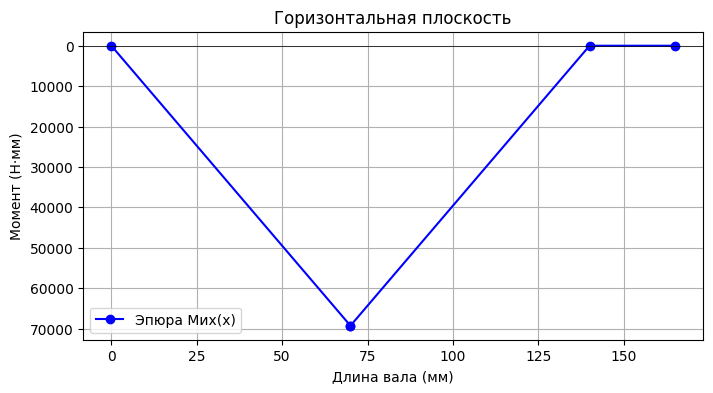

In [983]:
x, M = resultX_2

plt.figure(figsize=(8, 4))
plt.plot(x, M, marker='o', linestyle='-', color='blue', label='Эпюра Mиx(x)')
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('Длина вала (мм)')
plt.ylabel('Момент (Н·мм)')
plt.title('Горизонтальная плоскость')
plt.grid(True)
plt.legend()

# Инвертируем ось Y
plt.gca().invert_yaxis()
plt.show()

***
### Проверка валов на усталостную прочность

In [984]:
# Считаю коэффициент для углеродистой стали
# po_b = 900 (3 - Чернавский стр 88)
po_b = 900
po__1 = 0.43*po_b
print(po__1)

387.0


In [985]:
t__1 = 0.58*po__1
print(int(t__1))

224


In [986]:
W_netto = 0.1 * df1 ** 3
print(W_netto)
W_knetto = 0.2*df1 ** 3
print(W_knetto)
po_a = M_k1/W_netto
print(po_a)

6593.9264
13187.8528
10.176031082178897


In [987]:
k_po = 2.45
k_f = 0.9
k_t = 2
k_d = 0.81
t_a = 0.5*T1/W_knetto
ksi = 0.1
ksi_t = 0.05
po_m = 20
t_m = 40
print(t_a)

0.3753454087688937


In [988]:
s_po = po__1/(k_po*po_a/(k_d*k_f) + ksi*po_m)
print(f"{po__1}/({k_po}*{po_a}/({k_d}*{k_f}) + {ksi}*{po_m}) = {po__1/(k_po*po_a/(k_d*k_f) + ksi*po_m)}")
print(s_po)

387.0/(2.45*10.176031082178897/(0.81*0.9) + 0.1*20) = 10.690819952092264
10.690819952092264


In [989]:
s_t = t__1/(k_t*t_a/(k_d*k_f) + ksi_t*t_m)
print(f"{t__1}/({k_t}*{t_a}/({k_d}*{k_f}) + {ksi_t}*{t_m}) = {t__1/(k_t*t_a/(k_d*k_f) + ksi_t*t_m)}")
print(s_t)

224.45999999999998/(2*0.3753454087688937/(0.81*0.9) + 0.05*40) = 74.08521767768906
74.08521767768906


In [990]:
s_1 = s_po * s_t/(s_po ** 2 + s_t ** 2) ** 0.5
print(s_1)

10.581217293243148


##### Для быстроходного вала
Вывод:
6,7 > `[s = 2,5..3]`

In [991]:
W_netto2 = 0.1 * d_3st_2 ** 3
print(W_netto2)
W_knetto2 = 0.2*d_3st_2 ** 3
print(W_knetto2)
po_a2 = M_k2/W_netto2
print(po_a2)

6400.0
12800.0
12.90625


In [992]:
t_a2 = 0.5*T2/W_knetto2
print(t_a2)

7.734375


In [993]:
s_po2 = po__1/(k_po*po_a2/(k_d*k_f) + ksi*po_m)
print(f"{po__1}/({k_po}*{po_a2}/({k_d}*{k_f}) + {ksi}*{po_m}) = {po__1/(k_po*po_a2/(k_d*k_f) + ksi*po_m)}")
print(s_po2)

387.0/(2.45*12.90625/(0.81*0.9) + 0.1*20) = 8.528941734860267
8.528941734860267


In [994]:
s_t2 = t__1/(k_t*t_a2/(k_d*k_f) + ksi_t*t_m)
print(f"{t__1}/({k_t}*{t_a2}/({k_d}*{k_f}) + {ksi_t}*{t_m}) = {t__1/(k_t*t_a2/(k_d*k_f) + ksi_t*t_m)}")
print(s_t2)

224.45999999999998/(2*7.734375/(0.81*0.9) + 0.05*40) = 9.667026452213213
9.667026452213213


In [995]:
s_2 = s_po2 * s_t2/(s_po2 ** 2 + s_t2 ** 2) ** 0.5
print(s_2)

6.395581841007796


##### Для тихоходного вала
Вывод:
6,39 > `[s = 2,5..3]`

***
### Проверка подшипников по динамической грузоподъемности
#### Расчет подшипников на быстроходном валу

In [996]:
def resurs1():

    # Частота оборотов
    n = n1

    # Подшипник: данные
    # 7606
    Cr = 63000
    e = 0.319
    Y = 1.882
    X = 0.4

    V = 1
    Kb = 1.3
    Kt = 1
    p = 10/3

    # ----------Силы----------
    #
    #        (Fa)--->
    #   (A)--->     <---(B)
    #
    # Силы от подшипников и осевая сила
    # направлены как на рисунке: Vab == True
    #
    # Если сила Fa направлена в другую сторону
    # Установить флаг Vab == false или указать
    # силу со знаком минус

    Vab = True

    # Силы: указывать в Ньютонах
    Fa = Fa1
    Ra = Ra_sum_1
    Rb = Rb_sum_1

    print("Входные данные")
    print("\nСилы:")
    print(f"Fa = {Fa}")
    print(f"Ra = {Ra}")
    print(f"Rb = {Rb}")

    print("\nПодшипник:")
    print(f"Cr = {Cr}")
    print(f"e = {e}")
    print(f"X = {X}")
    print(f"Y = {Y}")

    print("\nПостоянные:")
    print(f"p = {p:.3f}")
    print(f"V = {V}")
    print(f"Kb = {Kb}")
    print(f"Kt = {Kt}")


    if Fa < 0:
        Vab = False
        Fa = -Fa

    S1 = 0.83 * e * Ra
    S2 = 0.83 * e * Rb
    F1, F2 = (S2, Fa + S1) if Vab else (Fa + S2, S1)
    f_ek = lambda r, a: (X*V*r + Y*a)*Kb*Kt
    F1_ek = f_ek(Ra, F1)
    F2_ek = f_ek(Rb, F2)

    print("\nВыходные данные")
    print(f"Fa = {Fa}")
    print(f"Ra = {Ra:.1f}")
    print(f"Rb = {Rb:.1f}")
    print(f"S1 = {S1:.1f}")
    print(f"S2 = {S2:.1f}")
    print(f"F1 = {F1:.1f}")
    print(f"F2 = {F2:.1f}")
    print(f"Fa1/VFr1 = {F1/Ra:.1f}")
    print(f"Fa2/VFr2 = {F2/Rb:.1f}")
    print(f"F1_ek = {F1_ek:.1f}")
    print(f"F2_ek = {F2_ek:.1f}")

    f_l = lambda x: (Cr/x) ** p
    L1 = f_l(F1_ek)
    L2 = f_l(F2_ek)

    print(f"Срок службы 1-го подшипника = {L1:.0f} млн.об")
    print(f"Срок службы 2-го подшипника = {L2:.0f} млн.об")

    f_lh = lambda x: 1e6 * x / (60 * n)
    lh1 = f_lh(L1)
    lh2 = f_lh(L2)

    print(f"Срок службы 1-го подшипника = {lh1:.0f} часов")
    print(f"Срок службы 2-го подшипника = {lh2:.0f} часов")

resurs1()

Входные данные

Силы:
Fa = 1980.0
Ra = 361.4832224003735
Rb = 714.9939092675712

Подшипник:
Cr = 63000
e = 0.319
X = 0.4
Y = 1.882

Постоянные:
p = 3.333
V = 1
Kb = 1.3
Kt = 1

Выходные данные
Fa = 1980.0
Ra = 361.5
Rb = 715.0
S1 = 95.7
S2 = 189.3
F1 = 189.3
F2 = 2075.7
Fa1/VFr1 = 0.5
Fa2/VFr2 = 2.9
F1_ek = 651.1
F2_ek = 5450.2
Срок службы 1-го подшипника = 4158143 млн.об
Срок службы 2-го подшипника = 3492 млн.об
Срок службы 1-го подшипника = 49046273 часов
Срок службы 2-го подшипника = 41190 часов


##### Подшипники быстроходного вала проработают дольше указанного в задании срока 44092 > 16000 часов

#### Расчет подшипников на тихоходном валу

##### Определяю соотношение Fa/(VFr)

In [997]:
V = 1
# Подшипник A
print(f"{Fa2}/({V}*{Ra_sum_2}) = {Fa2/(V*Ra_sum_2)}")
# Подшипник B
print(f"{Fa2}/({V}*{Rb_sum_2}) = {Fa2/(V*Rb_sum_2)}")


396.0/(1*1180.4089571510583) = 0.3354769527975747
396.0/(1*993.001017324838) = 0.3987911322254542



Выбираю радиально-упорный подшипник так как $F_a/(VF_r) > 0,35$
###### Подшипник нахожу в 3-Чернавский стр.435 (или 219 дежавю): **36207** ($α = 12°$)

In [998]:
C_0_podsh_t = 18100
print(f"{Fa2}/{C_0_podsh_t} = {Fa2/C_0_podsh_t}")

396.0/18100 = 0.021878453038674032


##### Определяю e по таблице 5.1
Для соотношения $F_a/C_0 = 0,021$ и для $α = 12$  выбираю ближайшее $e = 0,34$ (радиально-упорный шариковый однорядный)

$$F_a/C_a = 0.021 < e = 0.34$$
Устанавливаю:

 X = 1

 Y = 0

In [999]:
# Устанавливаю e
e_podsh_t = 0.34
X_podsh_t = 1
Y_podsh_t = 0

In [1000]:
def resurs2():

    # Частота оборотов
    n = n2

    # Подшипник: данные
    # 36207
    Cr = 24000
    C0 = C_0_podsh_t
    alpha = 12
    e = e_podsh_t
    Y = X_podsh_t
    X = Y_podsh_t

    V = 1
    Kb = 1.3
    Kt = 1
    p = 3

    # ----------Силы----------
    #
    #        (Fa)--->
    #   (A)--->     <---(B)
    #
    # Силы от подшипников и осевая сила
    # направлены как на рисунке: Vab == True
    #
    # Если сила Fa направлена в другую сторону
    # Установить флаг Vab == false или указать
    # силу со знаком минус

    Vab = False

    # Силы: указывать в Ньютонах
    Fa = Fa2
    Ra = Ra_sum_2
    Rb = Rb_sum_2

    print("Входные данные")
    print("\nСилы:")
    print(f"Fa = {Fa}")
    print(f"Ra = {Ra}")
    print(f"Rb = {Rb}")

    print("\nПодшипник:")
    print(f"Cr = {Cr}")
    print(f"C0 = {C0}")
    print(f"e = {e}")
    print(f"X = {X}")
    print(f"Y = {Y}")

    print("\nПостоянные:")
    print(f"p = {p}")
    print(f"V = {V}")
    print(f"Kb = {Kb}")
    print(f"Kt = {Kt}")


    if Fa < 0:
        Vab = False
        Fa = -Fa

    S1 = e * Ra
    S2 = e * Rb
    F1, F2 = (S2, Fa + S1) if Vab else (Fa + S2, S1)
    f_ek = lambda r, a: (X*V*r + Y*a)*Kb*Kt
    F1_ek = f_ek(Ra, F1)
    F2_ek = f_ek(Rb, F2)

    print("\nВыходные данные")
    print(f"Fa = {Fa}")
    print(f"Ra = {Ra:.1f}")
    print(f"Rb = {Rb:.1f}")
    print(f"S1 = {S1:.1f}")
    print(f"S2 = {S2:.1f}")
    print(f"F1 = {F1:.1f}")
    print(f"F2 = {F2:.1f}")
    print(f"Fa1/VFr1 = {F1/Ra:.1f} > 0.35 - нужен радиально-упорный подшипник")
    print(f"Fa2/VFr2 = {F2/Rb:.1f} > 0.35 - нужен радиально-упорный подшипник")
    print(f"F1_ek = {F1_ek:.1f}")
    print(f"F2_ek = {F2_ek:.1f}")

    f_l = lambda x: (Cr/x) ** p
    L1 = f_l(F1_ek)
    L2 = f_l(F2_ek)

    print(f"Срок службы 1-го подшипника = {L1:.0f} млн.об")
    print(f"Срок службы 2-го подшипника = {L2:.0f} млн.об")

    f_lh = lambda x: 1e6 * x / (60 * n)
    lh1 = f_lh(L1)
    lh2 = f_lh(L2)

    print(f"Срок службы 1-го подшипника = {lh1:.0f} часов")
    print(f"Срок службы 2-го подшипника = {lh2:.0f} часов")

resurs2()

Входные данные

Силы:
Fa = 396.0
Ra = 1180.4089571510583
Rb = 993.001017324838

Подшипник:
Cr = 24000
C0 = 18100
e = 0.34
X = 0
Y = 1

Постоянные:
p = 3
V = 1
Kb = 1.3
Kt = 1

Выходные данные
Fa = 396.0
Ra = 1180.4
Rb = 993.0
S1 = 401.3
S2 = 337.6
F1 = 733.6
F2 = 401.3
Fa1/VFr1 = 0.6 > 0.35 - нужен радиально-упорный подшипник
Fa2/VFr2 = 0.4 > 0.35 - нужен радиально-упорный подшипник
F1_ek = 953.7
F2_ek = 521.7
Срок службы 1-го подшипника = 15936 млн.об
Срок службы 2-го подшипника = 97335 млн.об
Срок службы 1-го подшипника = 4699332 часов
Срок службы 2-го подшипника = 28702255 часов


***
### Конструирование корпуса
#### Основные элементы корпуса из чугуна (табл. 6.1 стр 32)

In [1001]:
# Толщина стенки корпуса редуктора
po_stenka = 0.04*a_w + 2
print(po_stenka)

7.0


In [1002]:
# Толщина крышки редуктора
po_1_krishka = 0.032*a_w + 2
print(po_1_krishka)

6.0


In [1003]:
# Толщина верхнего пояса(фланца) корпуса
b_korp = 1.4*po_stenka
print(b_korp)
b_korp = 10
print(b_korp)

9.799999999999999
10


In [1004]:
# Толщина нижнего пояса (фланца) крышки корпуса
b_krishka = 1.5*po_1_krishka
print(b_krishka)

9.0


In [1005]:
# Толщина нижнего пояса корпуса
# При наличии бобышки
p1_korp = 1.5*po_stenka
print(p1_korp)
p1_korp = 12
print(p1_korp)

p2_korp = 2.25 * po_stenka
print(p2_korp)
p2_korp = 16
print(p2_korp)

10.5
12
15.75
16


In [1006]:
# Толщина ребер основания корпуса
m_korp = 0.85*po_stenka
print(m_korp)
m_korp = 6
print(m_korp)

5.95
6


In [1007]:
# Толщина ребер крышки
m1_krishka = 0.85*po_1_krishka
print(m)
m1_krishka = 5
print(m)

4.0
4.0


In [1008]:
# Диаметр фундаментных болтов (их число больше либо равно 4) (округляют до стандартных по таблице 6.2)
d1_bolt = 0.03 * a_w + 12
print(d1_bolt)
d1_bolt = 16
print(d1_bolt)


15.75
16


In [1009]:
# Диаметр болтов у подшипников
d2_bolt = 0.7*d1
print(d2_bolt)
d2_bolt = 12
print(d2_bolt)

35.0
12


In [1010]:
# Диаметр болтов соединяющих основание корпуса с крышкой
d3_bolt = 0.5*d1_bolt
print(d3_bolt)

8.0


In [1011]:
# Размеры определяющие положение болтов d2
e_bolt = 1*d2_bolt
print(e_bolt)

12


In [1012]:
# Размеры определяющие положение болтов d2

d4_bolt = 8 # Диаметр винтов крепления крышки подшипников (табл. 6.2)
q_bolt = 0.5 * d2_bolt + d4_bolt
print(q_bolt)

14.0


#### Дополнительные элементы корпуса из чугуна (табл. 6.1 стр 32)
##### Гнездо под подшипник

In [1013]:
# Винты крепления крышки подшипника d4
print(d4_bolt)

8


In [1014]:
# Число винтов
n_vint = 4
print(n_vint)

4


In [1015]:
# Диаметр гнезда для торцевых крышек подшипника
# Наружный диаметр подшипника 7606
D_t = 72
# Диаметр с припуском
Dk_t_prip = D_t + 2
print(Dk_t_prip)

74


In [1016]:
# Диаметр гнезда для торцевых крышек подшипника
# Наружный диаметр подшипника 36207
D_b = 72
# Диаметр с припуском (торцевая крышка)
Dk_b_prip = D_b + 2
print(Dk_b_prip)

74


In [1017]:
# Длина гнезда минимальная
# l_gnez = B(Ширина подшипника) + K2(высота буртика удерживающего подшипник) + (3...5)
# Ширина подшипника 36207
B_podsh = 17
l_gnez_t = B_podsh + 4 + 4
print(l_gnez_t)

25


In [1018]:
# Длина гнезда минимальная
# l_gnez = B(Ширина подшипника) + K2(высота буртика удерживающего подшипник) + (3...5)
# Ширина подшипника 7606
B_podsh_b = 29
l_gnez_b = B_podsh_b + 4 + 5
print(l_gnez_b)

38


#### Размеры штифта

In [1019]:
# Диаметр
d_shtift = d3_bolt
print(d_shtift)

8.0


In [1020]:
# Длина
l_shtift = b_korp + b_krishka + 5
print(l_shtift)

24.0


#### Наименьший зазор между наружной поверхностью колеса и стенкой корпуса

In [1021]:
# По диаметру и по торцам
x_zazor = 1.1 * po_stenka
print(x_zazor)
x_zazor = 8
print(x_zazor)

7.700000000000001
8


In [1022]:
# До днища от колеса
Y_zazor = 50
print(Y_zazor)

50
